In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import layers, models
from keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

# Load CIFAR-10 dataset

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

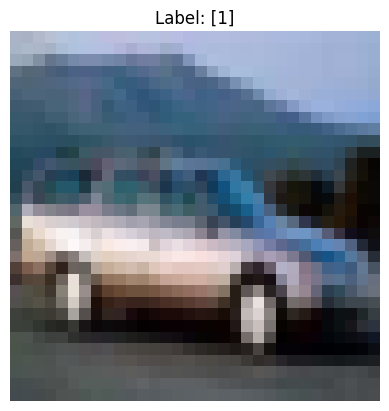

In [5]:
lb = 4
plt.imshow(x_train[lb])
plt.title(f"Label: {y_train[lb]}")
plt.axis('off')
plt.show()

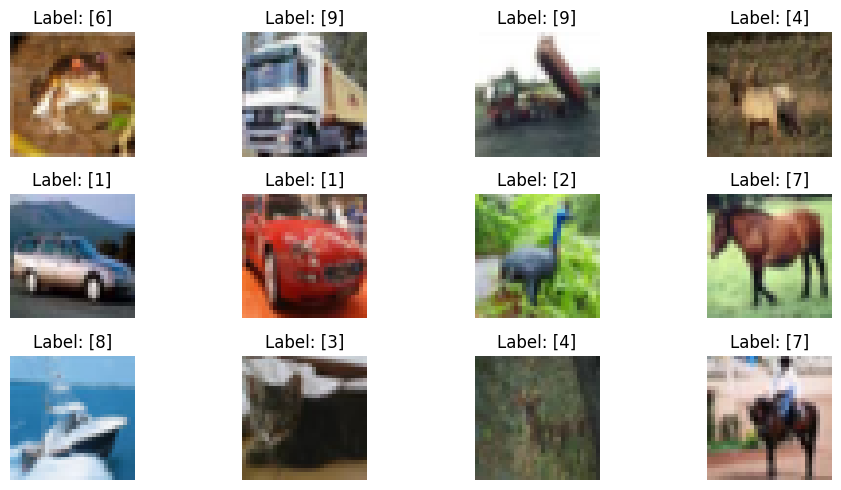

In [6]:
plt.figure(figsize=(10, 5))

for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(x_train[i])
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Normalize pixel value to the range [0, 1]

In [7]:
x_train, x_test = x_train/255, x_test/255

# Convert labels to one-dimensional arrays

In [8]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [9]:
y_train.shape

(50000,)

# Create the model

In [11]:
cnn_model = models.Sequential()

# First Convolutional Block

In [12]:
cnn_model.add(layers.Conv2D(32, (3, 3),
                            activation='relu',
                            input_shape=(32, 32, 3)))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPooling2D((2, 2)))

/home/abdur-rahman-saad/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Second Convolution Block

In [13]:
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPooling2D((2, 2)))

# Third Convolution Block

In [14]:
cnn_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(layers.BatchNormalization())

# Fully Connected Layers

In [15]:
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(128, activation='relu'))
cnn_model.add(layers.Dropout(0.5))
cnn_model.add(layers.Dense(10, activation='softmax'))

# Print model summary

In [16]:
cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 357,706 (1.36 MB)

 Trainable params: 357,258 (1.36 MB)

 Non-trainable params: 448 (1.75 KB)

# Compile the model

In [17]:
cnn_model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [18]:
history = cnn_model.fit(x_train, y_train,
                        epochs=10,
                        batch_size=64,
                        validation_split=0.2,
                        verbose=2)

2025-05-01 14:03:55.413267: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


Epoch 1/10


2025-05-01 14:04:06.077024: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19663488 exceeds 10% of free system memory.
2025-05-01 14:04:06.077704: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19663488 exceeds 10% of free system memory.
2025-05-01 14:04:06.133050: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 14191200 exceeds 10% of free system memory.
2025-05-01 14:04:06.202056: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19663488 exceeds 10% of free system memory.


625/625 - 80s - 129ms/step - accuracy: 0.4531 - loss: 1.6608 - val_accuracy: 0.4773 - val_loss: 1.4504
Epoch 2/10
625/625 - 66s - 106ms/step - accuracy: 0.5920 - loss: 1.1665 - val_accuracy: 0.5880 - val_loss: 1.1608
Epoch 3/10
625/625 - 68s - 109ms/step - accuracy: 0.6538 - loss: 0.9886 - val_accuracy: 0.5402 - val_loss: 1.3936
Epoch 4/10
625/625 - 73s - 118ms/step - accuracy: 0.6945 - loss: 0.8686 - val_accuracy: 0.6195 - val_loss: 1.1104
Epoch 5/10
625/625 - 52s - 84ms/step - accuracy: 0.7252 - loss: 0.7870 - val_accuracy: 0.6513 - val_loss: 1.0039
Epoch 6/10
625/625 - 58s - 92ms/step - accuracy: 0.7500 - loss: 0.7144 - val_accuracy: 0.6918 - val_loss: 0.9647
Epoch 7/10
625/625 - 67s - 107ms/step - accuracy: 0.7757 - loss: 0.6407 - val_accuracy: 0.6922 - val_loss: 0.9441
Epoch 8/10
625/625 - 64s - 103ms/step - accuracy: 0.7933 - loss: 0.5869 - val_accuracy: 0.6222 - val_loss: 1.2829
Epoch 9/10
625/625 - 85s - 136ms/step - accuracy: 0.8089 - loss: 0.5386 - val_accuracy: 0.7028 - val_

# Evaluate on the data

In [19]:
test_loss, test_accuracy = cnn_model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.2f}")

313/313 - 2s - 7ms/step - accuracy: 0.6593 - loss: 1.0860
Test Accuracy: 0.66


In [20]:
class_name = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "house", "ship", "truck"]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


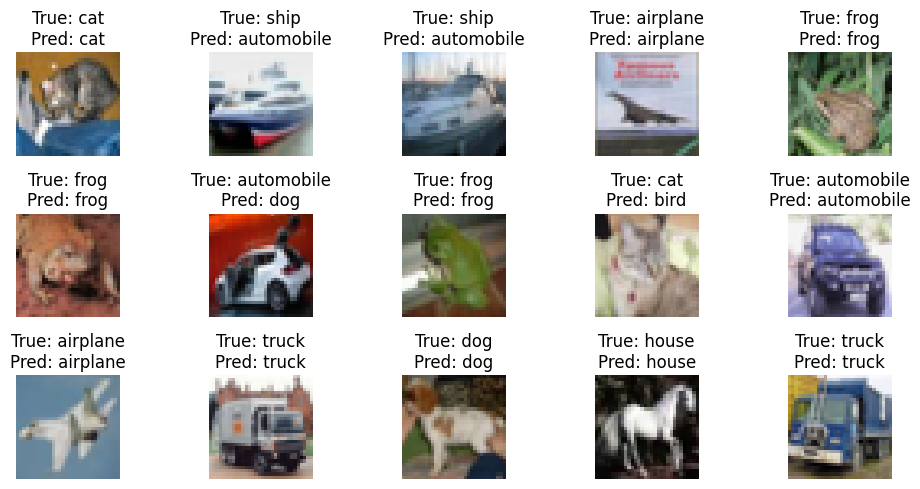

In [22]:
sample_images = x_test[:15]
sample_labels = y_test[:15]
predictions = np.argmax(cnn_model.predict(sample_images), axis=1)

plt.figure(figsize=(10, 5))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(sample_images[i])
    plt.title(f"True: {class_name[sample_labels[i]]}\nPred: {class_name[predictions[i]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Plot accuracy and loss

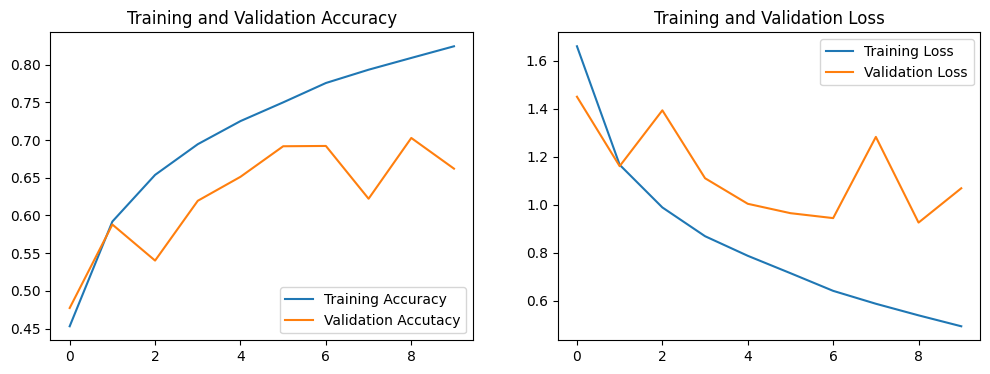

In [23]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accutacy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


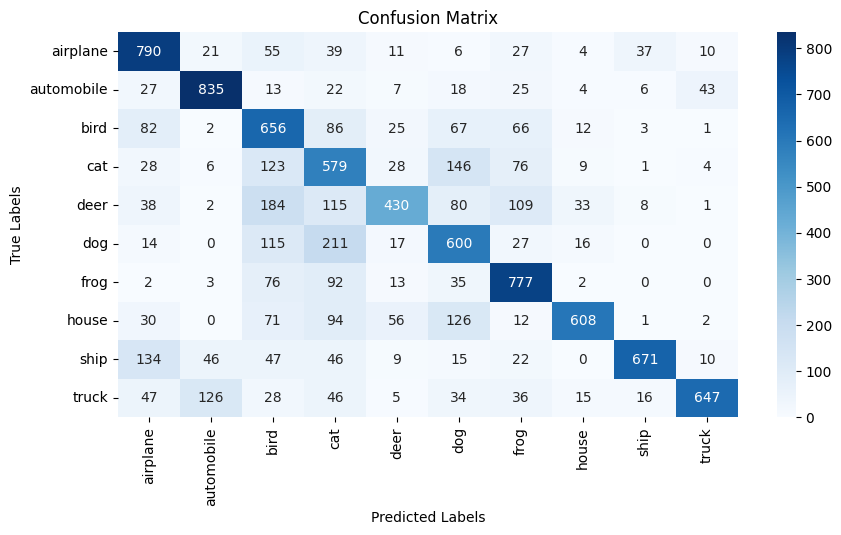

In [24]:
y_pred = np.argmax(cnn_model.predict(x_test), axis=1)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_name, yticklabels=class_name)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Generate a classification report 

In [25]:
report = classification_report(y_test, y_pred, target_names=class_name)
print(report)

              precision    recall  f1-score   support

    airplane       0.66      0.79      0.72      1000
  automobile       0.80      0.83      0.82      1000
        bird       0.48      0.66      0.55      1000
         cat       0.44      0.58      0.50      1000
        deer       0.72      0.43      0.54      1000
         dog       0.53      0.60      0.56      1000
        frog       0.66      0.78      0.71      1000
       house       0.86      0.61      0.71      1000
        ship       0.90      0.67      0.77      1000
       truck       0.90      0.65      0.75      1000

    accuracy                           0.66     10000
   macro avg       0.70      0.66      0.66     10000
weighted avg       0.70      0.66      0.66     10000

